In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/revops_executive_training_6_months.csv")

In [3]:
df.head()

,month,traffic_investment_brl,linkedin_spend,google_spend,instagram_spend,leads_generated,mqls,sqls,meetings_scheduled,deals_closed,revenue_brl,entry_product_sales,mid_product_sales,premium_product_sales
0,2025-07,2100,700,900,500,180,90,55,40,12,48000,6,4,2
1,2025-08,2300,800,1000,500,200,100,60,45,14,56000,7,5,2
2,2025-09,2200,750,950,500,195,95,58,42,13,52000,6,5,2
3,2025-10,2500,900,1100,500,230,115,70,50,18,76000,8,7,3
4,2025-11,2400,850,1050,500,220,110,68,48,16,68000,7,6,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   6 non-null      object
 1   traffic_investment_brl  6 non-null      int64 
 2   linkedin_spend          6 non-null      int64 
 3   google_spend            6 non-null      int64 
 4   instagram_spend         6 non-null      int64 
 5   leads_generated         6 non-null      int64 
 6   mqls                    6 non-null      int64 
 7   sqls                    6 non-null      int64 
 8   meetings_scheduled      6 non-null      int64 
 9   deals_closed            6 non-null      int64 
 10  revenue_brl             6 non-null      int64 
 11  entry_product_sales     6 non-null      int64 
 12  mid_product_sales       6 non-null      int64 
 13  premium_product_sales   6 non-null      int64 
dtypes: int64(13), object(1)
memory usage: 804.0+ bytes


In [5]:
df.describe()

,traffic_investment_brl,linkedin_spend,google_spend,instagram_spend,leads_generated,mqls,sqls,meetings_scheduled,deals_closed,revenue_brl,entry_product_sales,mid_product_sales,premium_product_sales
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2291.666667,796.666667,996.666667,498.333333,205.000000,102.000000,62.166667,44.833333,14.666667,60333.333333,6.833333,5.333333,2.500000
std,142.886902,71.180522,71.180522,4.082483,17.888544,9.273618,5.810909,3.710346,2.160247,10462.631919,0.752773,1.032796,0.547723
min,2100.000000,700.000000,900.000000,490.000000,180.000000,90.000000,55.000000,40.000000,12.000000,48000.000000,6.000000,4.000000,2.000000
25%,2212.500000,757.500000,957.500000,500.000000,196.250000,96.250000,58.500000,42.500000,13.250000,53000.000000,6.250000,5.000000,2.000000
50%,2275.000000,790.000000,990.000000,500.000000,202.500000,101.000000,61.000000,44.500000,14.500000,59000.000000,7.000000,5.000000,2.500000
75%,2375.000000,837.500000,1037.500000,500.000000,216.250000,108.000000,66.500000,47.250000,15.750000,66500.000000,7.000000,5.750000,3.000000
max,2500.000000,900.000000,1100.000000,500.000000,230.000000,115.000000,70.000000,50.000000,18.000000,76000.000000,8.000000,7.000000,3.000000


In [6]:
# Taxas de conversão do funil
df["lead_to_mql"] = df["mqls"] / df["leads_generated"]
df["mql_to_sql"] = df["sqls"] / df["mqls"]
df["sql_to_meeting"] = df["meetings_scheduled"] / df["sqls"]
df["meeting_to_sale"] = df["deals_closed"] / df["meetings_scheduled"]

df[[
    "month",
    "lead_to_mql",
    "mql_to_sql",
    "sql_to_meeting",
    "meeting_to_sale"
]]

,month,lead_to_mql,mql_to_sql,sql_to_meeting,meeting_to_sale
0,2025-07,0.500000,0.611111,0.727273,0.300000
1,2025-08,0.500000,0.600000,0.750000,0.311111
2,2025-09,0.487179,0.610526,0.724138,0.309524
3,2025-10,0.500000,0.608696,0.714286,0.360000
4,2025-11,0.500000,0.618182,0.705882,0.333333
5,2025-12,0.497561,0.607843,0.709677,0.340909


In [7]:
# medias do funil
df[[
    "lead_to_mql",
    "mql_to_sql",
    "sql_to_meeting",
    "meeting_to_sale"
]].mean()


lead_to_mql        0.497457
mql_to_sql         0.609393
sql_to_meeting     0.721876
meeting_to_sale    0.325813
dtype: float64

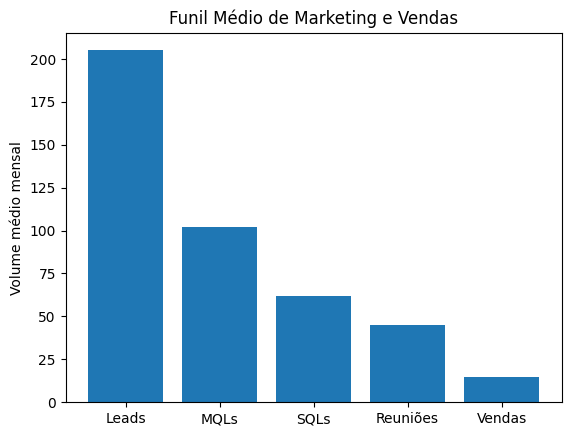

In [8]:
# visualização do funil
funnel = {
    "Leads": df["leads_generated"].mean(),
    "MQLs": df["mqls"].mean(),
    "SQLs": df["sqls"].mean(),
    "Reuniões": df["meetings_scheduled"].mean(),
    "Vendas": df["deals_closed"].mean()
}

plt.figure()
plt.bar(funnel.keys(), funnel.values())
plt.title("Funil Médio de Marketing e Vendas")
plt.ylabel("Volume médio mensal")
plt.show()